# Modelling 01

In this notebook I will explore different predictive models.  
First, I will create a baseline model by calculating the average of pickups per zone and per hour.  
After that, I will use some regression models to compare with the baseline model and select the best one.

### 1. [Import dataset and select features](#Import-dataset-and-select-features)

- [Select columns of interest](#Select-columns-of-interest)
- [Separate Input and Output variables](#Separate-Input-and-Output-variables)

### 2. [Split data](#Split-data)

NOTE: Create base model. It will give us the baseline accuracy and and I should try to beat this baseline accuracy using more advanced techniques. This base model could be the average for a specific hour.

# Import dataset and select features

From the cleaned datasets saved from previous notebooks, I will use the one from ``2019`` and will leave the others (``2018`` and ``2017``) in case I need more training data.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Select columns of interest

According to the conclusion from the notebook ``Data_Analysis_01.ipynb``, I will not use the following columns:

- ``month``
- ``hour``
- ``week``
- ``dayofweek``
- ``isholiday``
- ``LocationID``
- ``precipitation``
- ``pickups``

In [2]:
# Import dataset
df = pd.read_csv('../data/Data_Cleaned_2019_To_Model.csv', sep=',',                 
                 dtype = {"LocationID" : "object"},
                 parse_dates=['datetime'])

# Select columns of interest
df = df[['month', 'hour', 'week', 'dayofweek', 'isholiday', 'LocationID', 'precipitation', 'pickups']]
df.info() # check dtypes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586920 entries, 0 to 586919
Data columns (total 8 columns):
month            586920 non-null int64
hour             586920 non-null int64
week             586920 non-null int64
dayofweek        586920 non-null int64
isholiday        586920 non-null int64
LocationID       586920 non-null object
precipitation    586920 non-null float64
pickups          586920 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 35.8+ MB


,month,hour,week,dayofweek,isholiday,LocationID,precipitation,pickups
0,1,0,1,1,1,4,0.13,49.0
1,1,0,1,1,1,12,0.13,4.0
2,1,0,1,1,1,13,0.13,64.0
3,1,0,1,1,1,24,0.13,53.0
4,1,0,1,1,1,41,0.13,82.0


### Separate Input and Output variables

**INPUT variables**: (must be Pandas DataFrame)
- ``month``
- ``hour``
- ``week``
- ``dayofweek``
- ``isholiday``
- ``LocationID``
- ``precipitation``

**OUTPUT variable**: (must Pandas Series)
- ``pickups``

In [3]:
# IMPORT LIBRARIES
from sklearn.model_selection import train_test_split

# 2. Separate variables
X = df[['month','hour','week','dayofweek','isholiday','LocationID','precipitation']]
y = df['pickups']
print("FEATURES 'X' should be a Pandas DataFrame: ", type(X)) # 'X' must be DataFrame and 'y' must be a Pandas Series
display(X.head(2))
print("TARGET VARIABLE 'y' should be a Pandas Series: ",type(y))
display(y.head(2))


FEATURES 'X' should be a Pandas DataFrame:  <class 'pandas.core.frame.DataFrame'>


,month,hour,week,dayofweek,isholiday,LocationID,precipitation
0,1,0,1,1,1,4,0.13
1,1,0,1,1,1,12,0.13


TARGET VARIABLE 'y' should be a Pandas Series:  <class 'pandas.core.series.Series'>


0    49.0
1     4.0
Name: pickups, dtype: float64

# Split data

I will use ``train_test_split()`` from sklearn twice to split the data in:
- Train: 60%
- Validation: 20% (to validate training)
- Test: 20% (to validate the model)

In [49]:
# 3. FUNCTION TO SPLIT DATA
def split_data(X,y):
    valSize = 0.25 #0.8 * 0.2 = 0.2
    testSize = 0.2

    # Split TRAIN-TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Split TRAIN-VALIDATION
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valSize, random_state=1)
    
    print('X_train: ',X_train.shape[0]/X.shape[0])
    print('y_train: ',y_train.shape[0]/X.shape[0])

    print('X_val: ',X_val.shape[0]/X.shape[0])
    print('y_val: ',y_val.shape[0]/X.shape[0])

    print('X_test: ',X_test.shape[0]/X.shape[0])
    print('y_test: ',y_test.shape[0]/X.shape[0])
    
    return X_train, X_test, X_val, y_train, y_test, y_val

In [50]:
X_train, X_test, X_val, y_train, y_test, y_val = split_data(X,y)

X_train:  0.6
y_train:  0.6
X_val:  0.2
y_val:  0.2
X_test:  0.2
y_test:  0.2


# Models

As the output variable is a number we need to solve a **regression** problem.

I will start with the simplest regression model: **LINEAR REGRESSION**

### Baseline model: average of pickups per zone, per hour

I will use this baseline model to compare the results with the regression models.

In [75]:
df.head(100)

,month,hour,week,dayofweek,isholiday,LocationID,precipitation,pickups
0,1,0,1,1,1,4,0.13,49.0
1,1,0,1,1,1,12,0.13,4.0
2,1,0,1,1,1,13,0.13,64.0
3,1,0,1,1,1,24,0.13,53.0
4,1,0,1,1,1,41,0.13,82.0
5,1,0,1,1,1,42,0.13,48.0
6,1,0,1,1,1,43,0.13,272.0
7,1,0,1,1,1,45,0.13,36.0
8,1,0,1,1,1,48,0.13,481.0
9,1,0,1,1,1,50,0.13,245.0


In [65]:
basemodel = df.groupby(['hour', 'LocationID']).sum()
basemodel.sort_index()
basemodel.head(100)

month  week  dayofweek  isholiday  precipitation   pickups
hour LocationID                                                            
0    100          2382  9647       1093         10           4.07   48473.0
     103          2382  9647       1093         10           4.07       0.0
     107          2382  9647       1093         10           4.07   63765.0
     113          2382  9647       1093         10           4.07   37600.0
     114          2382  9647       1093         10           4.07   78735.0
     116          2382  9647       1093         10           4.07    3670.0
     12           2382  9647       1093         10           4.07     436.0
     120          2382  9647       1093         10           4.07      31.0
     125          2382  9647       1093         10           4.07   15712.0
     127          2382  9647       1093         10           4.07     342.0
     128          2382  9647       1093         10           4.07      13.0
     13           2382  9647       1093         10           4.07    9455.0
     137          2382  9647       1093         10           4.07   30264.0
     140          2382  9647       1093         10           4.07   17174.0
     141          2382  9647       1093         10           4.07   34489.0
     142          2382  9647       1093         10           4.07   51519.0
     143          2382  9647       1093         10           4.07    9650.0
     144          2382  9647       1093         10           4.07   43550.0
     148          2382  9647       1093         10           4.07   98922.0
     151          2382  9647       1093         10           4.07    8638.0
     152          2382  9647       1093         10           4.07    2343.0
     153          2382  9647       1093         10           4.07      36.0
     158          2382  9647       1093         10           4.07   49895.0
     161          2382  9647       1093         10           4.07   80974.0
     162          2382  9647       1093         10           4.07   58573.0
     163          2382  9647       1093         10           4.07   56421.0
     164          2382  9647       1093         10           4.07   75457.0
     166          2382  9647       1093         10           4.07    9316.0
     170          2382  9647       1093         10           4.07   57348.0
     186          2382  9647       1093         10           4.07   67835.0
     194          2382  9647       1093         10           4.07     131.0
     202          2382  9647       1093         10           4.07      93.0
     209          2382  9647       1093         10           4.07    8050.0
     211          2382  9647       1093         10           4.07   30565.0
     224          2382  9647       1093         10           4.07    2839.0
     229          2382  9647       1093         10           4.07   35261.0
     230          2382  9647       1093         10           4.07  120224.0
     231          2382  9647       1093         10           4.07   46115.0
     232          2382  9647       1093         10           4.07    7776.0
     233          2382  9647       1093         10           4.07   19166.0
     234          2382  9647       1093         10           4.07   79852.0
     236          2382  9647       1093         10           4.07   21534.0
     237          2382  9647       1093         10           4.07   40159.0
     238          2382  9647       1093         10           4.07   21157.0
     239          2382  9647       1093         10           4.07   34015.0
     24           2382  9647       1093         10           4.07    4869.0
     243          2382  9647       1093         10           4.07     680.0
     244          2382  9647       1093         10           4.07    3157.0
     246          2382  9647       1093         10           4.07   34865.0
     249          2382  9647       1093         10           4.07  104298.0
     261          2382  9647       1093         10           4.07

date time object into unix-tipe format

In [ ]:
df.info()

### Linear Regression

score() Returns the coefficient of determination R^2 of the prediction.<br>
Values from 0 to 1. Best is 1.<br>
My model has a very poor score....

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# 4.1 Create an instance of the model and train it
#reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression()

#reg_param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#reg_grid = GridSearchCV(reg,reg_param, cv=3)
#reg_grid.fit(X_train, y_train)
reg.fit(X_train, y_train)

# Do predictions
reg_y_pred = reg.predict(X_val)

In [52]:
print(reg_grid.score(X_train, y_train))
print(reg_grid.score(X_val, y_val))
print(reg_grid.score(X_test, y_test))

0.11462011384296078
0.1092576219241913
0.1084596641305764


### Visualize Real values VS Predicted values

I create a function to visually check the difference between the real values and the predicted values.

In [53]:
def plot_real_vs_pred(y, y_pred):
    reg_real_vs_pred = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
    reg_real_vs_pred = reg_real_vs_pred.head(40)
    reg_real_vs_pred1.plot(kind='bar', figsize=(16,5))
    plt.show()

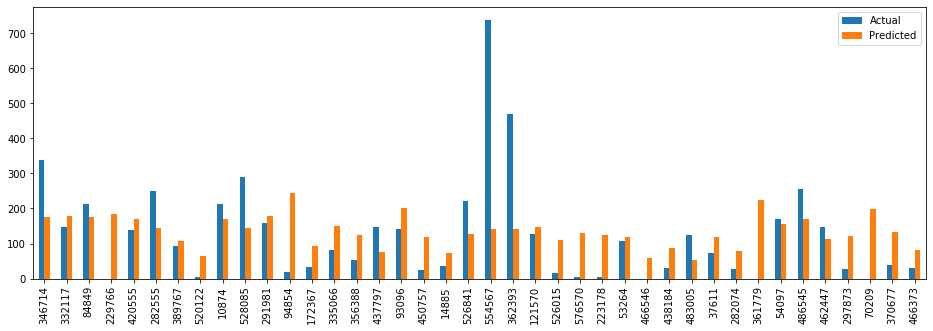

In [54]:
plot_real_vs_pred(y_val, reg_y_pred)

Metrics: MAE, RMSE

In [47]:
y_val[y_val == 0.01] = 1
MAPE = np.mean(np.abs(y_val - reg_y_pred)/y_val)
MAPE

18.270486977012936

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE: same units as target variable. It is more robust to outliers
MAE = mean_absolute_error(y_val, reg_y_pred)

# RMSE: same units as target variable
RMSE = np.sqrt(mean_squared_error(y_val, reg_y_pred))

# Correlation
R = np.corrcoef(reg_y_pred, y_val)[0][1]

# R^2
R2 = reg.score(X_train, y_train)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R^2 (Coefficient of determination): ', R2)
print('R (Correlation coefficient): ', R)

MAE:  110.11816891188789
MSE:  22775.957825598234
RMSE:  150.91705611228386
R^2 (Coefficient of determination):  0.11462011384296078
R (Correlation coefficient):  0.33076886258728294


### K Nearest Neighbour Regressor (KNN)
Parameters:

   **k**: number of neighbors <br>
   **weight**: way to give more weight to points which are nearby and less weight to the points which are farther away.<br>
- 'uniform': all the same weight.<br>
- 'distance': weighted average per distance.<br>
- 'Custom': weighted average provided by user<br>


In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance.
# Define number of neighbors.
# weights possible values: 'uniform', 'distance', [callable] user defined function
regk = KNeighborsRegressor(n_neighbors=2, weights = 'uniform')

# Train the data
regk.fit(X_train, y_train)

# Do predictions
regk_y_pred = regk.predict(X_val)
print(regk.score(X_train, y_train))
print(regk.score(X_val, y_val))
print(regk.score(X_test, y_test))
print('correlation: ', np.corrcoef(regk_y_pred, y_val)[0][1])

0.952489870584081
0.8988937797534982
0.9003380952478643
correlation:  0.9484065103130591


In [91]:
# Merge X_train with predictions

ttt = X_val.copy()
ttt['pickups'] = y_val
ttt['pickups Prediction'] = regk_y_pred
ttt.head()

,month,hour,week,dayofweek,isholiday,LocationID,precipitation,pickups,pickups Prediction
397589,9,6,36,3,0,74,0.0,44.0,43.0
351117,8,8,32,2,0,158,0.0,87.0,101.0
202628,5,0,19,1,0,113,0.0,52.0,62.0
381299,8,3,35,0,0,13,0.0,0.0,0.5
305923,7,6,28,2,0,12,0.0,0.0,0.5


Probando ahora con GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

regk_grid = GridSearchCV(KNeighborsRegressor(),
                       param_grid={"n_neighbors":np.arange(2,5)},
                       cv = 2,
                       scoring = "neg_mean_absolute_error")

# Train the model with the dataset
regk_grid.fit(X_train,y_train)

# Do predictions
regk_grid_y_pred = regk_grid.predict(X_val)
print(regk_grid.score(X_train, y_train))
print(regk_grid.score(X_val, y_val))
print(regk_grid.score(X_test, y_test))
print('correlation: ', np.corrcoef(regk_grid_y_pred, y_val)[0][1])
%time

-17.957848694124504
-24.121725845657554
-23.97747847520388
correlation:  0.9603215863472202
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


In [96]:
regk_grid.best_params_

{'n_neighbors': 4}

## MAE

Measures average magnitud of the errors without considering their direction (all errors in absolute value). It is intuitive to calculate, but you lose information related to the magnitud of the error.<br>
Units are the same as the target variable.<br>
Value range from 0 to infinite. Lower values are better.

In [39]:
from sklearn.metrics import mean_absolute_error

# Use against predictions
MAE = mean_absolute_error(reg.predict(X_val), y_val)
MAE

110.11816891188789

## MAPE

Similar to MAE but it measures the error in percentage.<br>
Lower values are better.<br>
MAPE is not in sklearn so I calculate it MANUALLY with pandas:

In [40]:
MAPE = np.mean(np.abs(reg.predict(X_val) - y_val)/y_val)
MAPE

inf

## RMSE

Measures average magnitud of errors.<br>
Units are the same as the target variable.<br>
Value range from 0 to infinite. Lower values are better.

In [41]:
from sklearn.metrics import mean_absolute_error

# Use against predictions (we have to calculate the squared root of MSE)
RMSE = np.sqrt(mean_absolute_error(reg.predict(X_val), y_val))
RMSE

10.493720451388434

In [42]:
print('MEAN: ', y_val.mean())
print('MEDIAN: ', y_val.median())
print('MAE: ', MAE)
print('MAPE: ', MAPE)
print('RMSE: ', RMSE)

MEAN:  128.76110032031622
MEDIAN:  63.0
MAE:  110.11816891188789
MAPE:  inf
RMSE:  10.493720451388434


## Correlation

**There should be a strong correlation between predictions and real values.<br>
However, I get a very week correlation value of 0.31**

In [43]:
np.corrcoef(reg.predict(X_val), y_val)[0][1]

0.33076886258728294

## Bias
It is the average of errors (prediction values minus real values).<br>
Negative errors will compensate positive ones.

In [44]:
bias = np.mean(reg.predict(X_val) - y_val)
bias

0.8672270823939399

## Variance
Is the average of errors in predictions between two different data sets.

In [45]:
# create table from X_train with same number of rows as X_val
# so it can be used to calculate the variance
X_train_for_variance = X_train.head(X_val.shape[0])

variance = np.mean(reg.predict(X_train_for_variance) - reg.predict(X_val))
variance

0.08362696126734569

In [47]:
# Merge X_train with predictions
combine = X_train.copy()
combine['pickups'] = y_train
combine['pickups Prediction'] = reg.predict(X_train)

combine.head(100)

,month,hour,week,dayofweek,isholiday,LocationID,precipitation,pickups,pickups Prediction
233539,5,5,21,6,0,186,0.00,31.0,102.932998
567551,12,22,51,3,0,244,0.00,13.0,226.832397
20598,1,19,2,6,0,141,0.00,298.0,183.452942
241011,5,21,22,3,0,75,0.00,53.0,165.070190
247179,6,17,23,0,0,90,0.00,212.0,144.275875
246256,6,3,23,0,0,143,0.00,2.0,74.078136
130727,3,7,12,5,0,68,0.00,95.0,72.411218
532594,11,5,48,3,0,74,0.00,11.0,48.477139
56410,2,1,6,1,0,249,0.00,90.0,111.025018
70791,2,0,7,3,0,162,0.00,195.0,67.912921


In [49]:
# Merge X_test with predictions
combine2 = X_test.copy()
combine2['pickups'] = y_test
combine2['pickups Prediction'] = reg.predict(X_test)

combine2.head(100)

,month,hour,week,dayofweek,isholiday,LocationID,precipitation,pickups,pickups Prediction
190258,4,7,18,0,0,194,0.00,1.0,125.863205
88815,2,5,9,0,0,163,0.00,28.0,103.812273
376609,8,5,34,4,0,13,0.00,9.0,28.305244
520565,11,17,47,2,0,166,0.00,120.0,165.010284
329609,7,23,30,2,0,153,0.00,0.0,206.682327
344968,8,12,31,5,0,231,0.00,164.0,161.342200
434099,9,23,39,4,0,43,0.00,97.0,156.805808
350313,8,20,32,1,0,158,0.00,141.0,187.222885
218510,5,21,20,3,0,120,0.00,0.0,182.816790
561757,12,8,51,0,0,141,0.00,427.0,95.296892


In [ ]:
predictions = reg.predict(X_test)
X_test_g = X_test.groupby(['month', 'day','hour','LocationID']).sum()
X_test_g.head(100)

## Pack model with Pickle

In [ ]:
import pickle
pickle.dump(reg,open('./model_reg_01.pickle','wb'))